<a href="https://colab.research.google.com/github/quantumhome/DataAnalysisCaseStudy/blob/master/Netflix_Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

*   **Customer Behaviour and it’s prediction lies
at the core of every Business Model. From
Stock Exchange, e Commerce and
Automobile to even Presidential Elections,
predictions serve a great purpose. Most of
these predictions are based on the data
available about a person’s activity either
online or in person. bold text**
*   **Recommendation Engines are the much
needed manifestations of the desired
Predictability of User Activity.
Recommendation Engines move one step
further and not only give information but
put forth strategies to further increase users
interaction with the platform.**

*   **In today’s world OTT platform and Streaming
Services have taken up a big chunk in the
Retail and Entertainment industry.
Organizations like Netflix, Amazon etc.
analyse User Activity Pattern’s and suggest
products that better suit the user needs and
choices.**
*   **For the purpose of this Project we will be
creating one such Recommendation Engine
from the ground up, where every single user,
based on there area of interest and ratings,
would be recommended a list of movies that
are best suited for them.**

**Dataset Information**

  **1.ID Contains the separate keys for customer and movies.**

  **2.Rating A section contains the user ratings for all the movies.**

  **3.Genre Highlights the category of the movie.**

  **4.Movie Name Name of the movie with respect to the movie id.**

**Objective**

  **1.Find out the list of most popular and liked genre.**

  **2.Create Model that finds the best suited Movie for one user in every genre.**

  **3.Find what Genre Movies have received the best and worst ratings based on User Rating.**





In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combied_path = '/content/sample_data/combined_data_1.txt'
records = []
movie_id = None

with open(combied_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line.endswith(':'):
            movie_id = int(line.replace(':', ''))
        else:
            try:
                user_id, rating, date = line.split(',')
                records.append([int(user_id), movie_id, float(rating), date])
            except:
                continue

Netflix_DataSet = pd.DataFrame(records, columns=['CustID', 'MovieID', 'Rating', 'Date'])


print("✅ Ratings loaded:", Netflix_DataSet.shape)
Netflix_DataSet.head()

✅ Ratings loaded: (24053764, 4)


,CustID,MovieID,Rating,Date
0,1488844,1,3.0,2005-09-06
1,822109,1,5.0,2005-05-13
2,885013,1,4.0,2005-10-19
3,30878,1,4.0,2005-12-26
4,823519,1,3.0,2004-05-03


In [3]:
Netflix_DataSet.dropna(inplace=True)


In [4]:
# How many Total number of movies
movie_count= Netflix_DataSet['MovieID'].nunique()
print("Total number of movies:", movie_count)

Total number of movies: 4499


In [5]:
# To calculate how many unique users are there
total_customer_count =Netflix_DataSet["CustID"].nunique()  # How many unique value are there in customer id column
total_customer_count

470758

In [6]:
rating_count= Netflix_DataSet["Rating"].nunique()
rating_count

5

In [7]:
# To find how many user have rated the movies as 1,2,3,4,5 starts to the movies

rating_starts = Netflix_DataSet.groupby("Rating")["Rating"].agg(["count"])
rating_starts

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


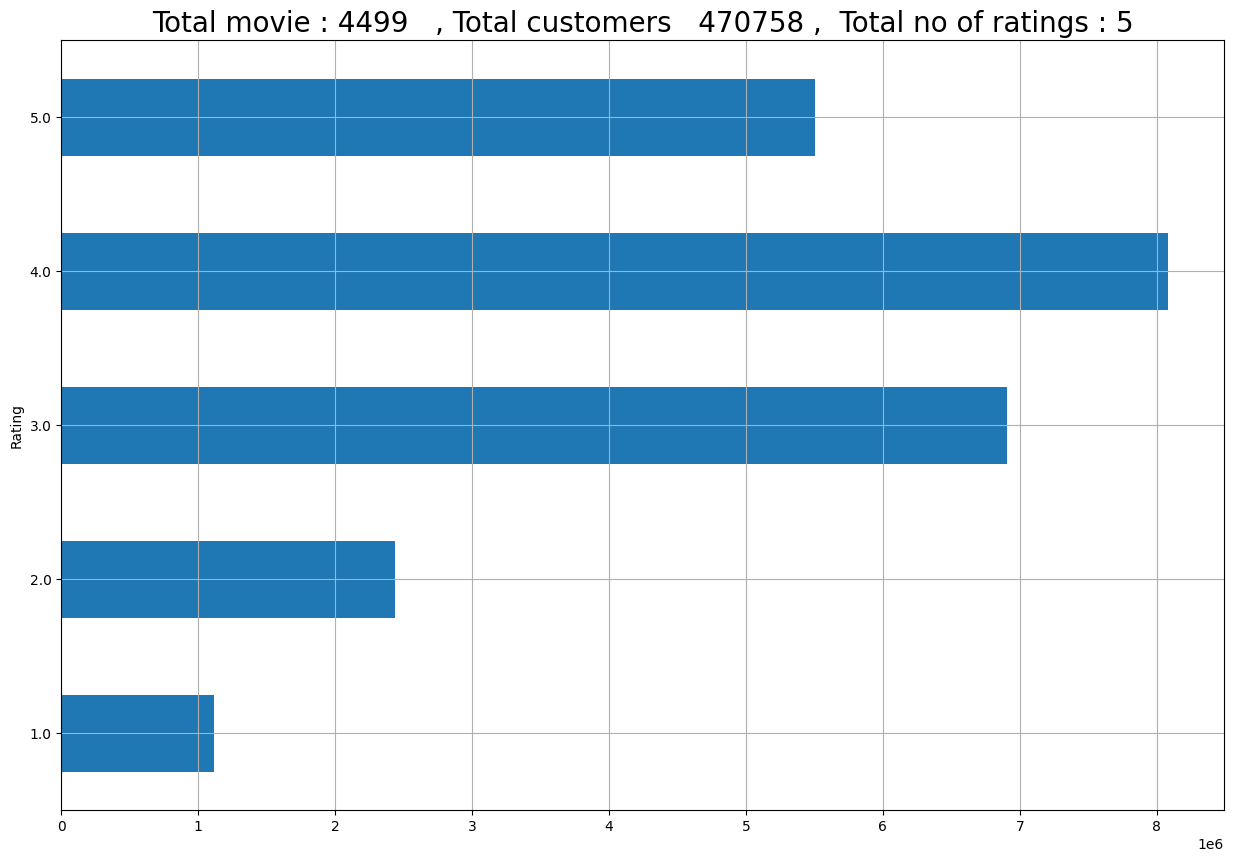

In [8]:
ax= rating_starts.plot(kind="barh",legend=False , figsize=(15,10))
plt.title(f'Total movie : {movie_count}   , Total customers   {total_customer_count} ,  Total no of ratings : {rating_count}', fontsize=20)
plt.grid(True)
plt.show()

In [9]:
Netflix_DataSet = Netflix_DataSet[Netflix_DataSet["Rating"].notna()]
# To keep only the rows where the rating column is not null ( example It exclude rows whete the Rating is NaN)

In [10]:
# Data set info
Netflix_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053764 entries, 0 to 24053763
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   CustID   int64  
 1   MovieID  int64  
 2   Rating   float64
 3   Date     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 734.1+ MB


**Pre Filtering**
# Pre -filtering

*   Remove all the users that have rated less movies
*   Remove all the movies that have been rated less


In [11]:
# Movie filter
# remove the movies with less number of ratings Count the rating of movie id
data_movie_summary= Netflix_DataSet.groupby("MovieID")["Rating"].count()
data_movie_summary

,Rating
MovieID,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [12]:
# Now we will create a benchmark ( consider a benchmark value like 60 percentile )
movie_benchmark=round(data_movie_summary.quantile(0.60))
movie_benchmark

908

In [13]:
# If any movie is having ratings less than 908 exclude that movie
Rejected_movies=data_movie_summary[data_movie_summary<movie_benchmark].index
Rejected_movies

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='MovieID', length=2699)

In [14]:
# Customer Filter
# removing the customers who have rated less number of movies
data_cust_summary = Netflix_DataSet.groupby("CustID")["Rating"].count()
data_cust_summary


,Rating
CustID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [15]:
#setting up benchmark
cust_benchmark=round(data_cust_summary.quantile(0.60))
cust_benchmark

36

In [16]:
Rejected_cust=data_cust_summary[data_cust_summary<cust_benchmark].index
Rejected_cust

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='CustID', length=282042)

In [17]:
#Removing the rejected movies and rejected customers from the data

# ~ is exclusion or negation operator which will exclude the resulted data from the actual data

In [18]:
Netflix_DataSet=Netflix_DataSet[~Netflix_DataSet["MovieID"].isin(Rejected_movies)]

In [19]:
Netflix_DataSet=Netflix_DataSet[~Netflix_DataSet["CustID"].isin(Rejected_cust)]

In [20]:
Netflix_DataSet

,CustID,MovieID,Rating,Date
693,712664,3,5.0,2004-02-01
694,1331154,3,4.0,2004-07-03
695,2632461,3,3.0,2005-07-22
696,44937,3,5.0,2004-06-22
697,656399,3,4.0,2003-09-20
...,...,...,...,...
24052346,1055714,4496,5.0,2005-06-20
24052347,2643029,4496,4.0,2005-09-10
24052348,267802,4496,4.0,2005-09-14
24052349,1559566,4496,3.0,2005-11-07


# **Load movie title Dataset**

In [21]:
df_title=pd.read_csv("/content/sample_data/movie_titles.csv",encoding="ISO-8859-1",header=None,names=["Movie_ID","Year","Movie_Name"],usecols=[0,1,2])
df_title

,Movie_ID,Year,Movie_Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [22]:
move_title_data =df_title.copy()

In [23]:
move_title_data

,Movie_ID,Year,Movie_Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [24]:
# removed the rejected movies
move_title_data = move_title_data[~move_title_data["Movie_ID"].isin(Rejected_movies)]
move_title_data

,Movie_ID,Year,Movie_Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


# **Model Building and Prediction**


In [25]:
!pip install "numpy<2"
!pip install scikit-surprise

In [26]:
from surprise import Reader , Dataset , SVD
from surprise.model_selection import cross_validate

In [27]:
# Assuming your DataFrame is named 'df'
random_sample = Netflix_DataSet.sample(n=100000)
random_sample

,CustID,MovieID,Rating,Date
6055316,848868,1180,3.0,2005-01-23
6010957,1834384,1180,5.0,2002-12-19
14552588,1054915,2800,3.0,2002-12-16
5382742,1122737,1102,3.0,2004-10-03
23585630,1775135,4405,3.0,2005-12-19
...,...,...,...,...
19824975,297742,3784,5.0,2005-07-14
15101395,27264,2913,5.0,2005-10-04
14941876,1944591,2874,3.0,2005-03-19
19965121,1334924,3824,4.0,2005-04-04


In [28]:
import random

# Define a genre pool
genre_pool = ['Action', 'Comedy', 'Drama', 'Romance', 'Thriller', 'Sci-Fi', 'Horror', 'Documentary']

# Assign genres randomly based on Movie_ID
random.seed(42)
random_sample['Genre'] = random_sample['MovieID'].map(lambda x: random.choice(genre_pool))
random_sample['Movie_Name'] = random_sample['MovieID'].map(lambda x: df_title[df_title['Movie_ID'] == x]['Movie_Name'])
# Confirm assignment
random_sample[['CustID','MovieID', 'Movie_Name', 'Rating', 'Genre']].head()


,CustID,MovieID,Movie_Name,Rating,Genre
6055316,848868,1180,"1179 A Beautiful Mind Name: Movie_Name, dty...",3.0,Comedy
6010957,1834384,1180,"1179 A Beautiful Mind Name: Movie_Name, dty...",5.0,Action
14552588,1054915,2800,"2799 Serendipity Name: Movie_Name, dtype: o...",3.0,Thriller
5382742,1122737,1102,"1101 Training Day Name: Movie_Name, dtype: ...",3.0,Romance
23585630,1775135,4405,4404 In Living Color: Season 3 Name: Movie_...,3.0,Romance


**Most rated genre**

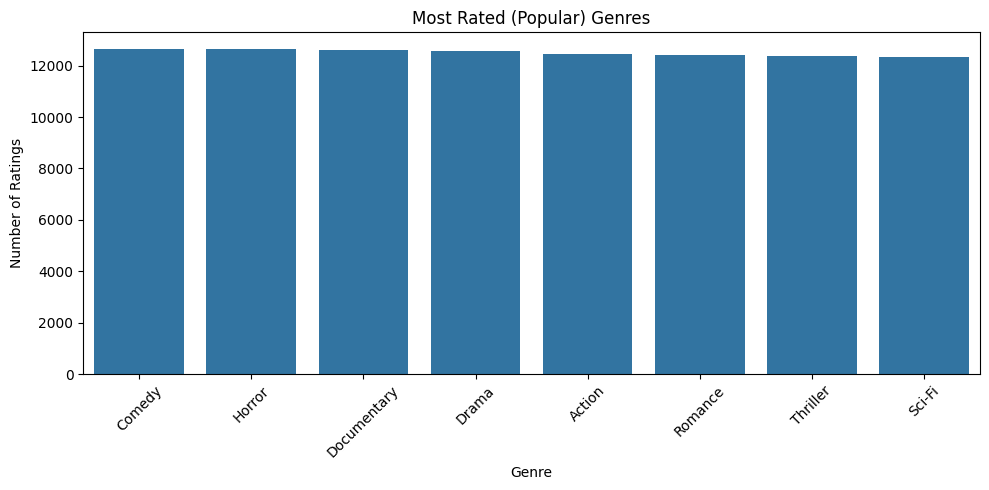

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=random_sample, x='Genre', order=random_sample['Genre'].value_counts().index)
plt.title('Most Rated (Popular) Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

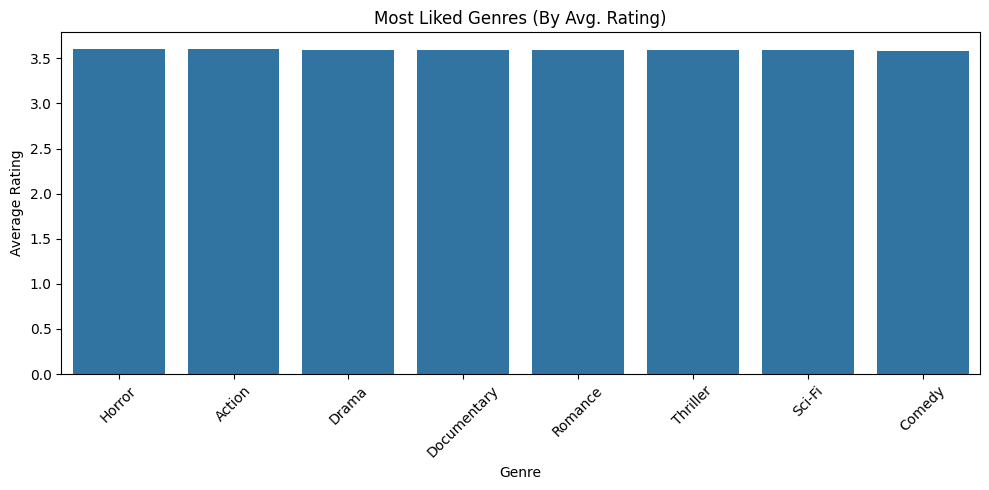

In [30]:
liked_genres = random_sample.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=liked_genres.index, y=liked_genres.values)
plt.title('Most Liked Genres (By Avg. Rating)')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
from surprise import SVD,Dataset,Reader
from surprise.model_selection import cross_validate

In [32]:
read=Reader()

In [33]:
data=Dataset.load_from_df(random_sample[["CustID","MovieID","Rating"]][:1000000],read)  # performing on 10 lakhs rows only for quick analyis
# load_from_df - It will be converting the data into SVD readable object format

In [34]:
# model Building
model=SVD()

In [35]:
cross_validate(model,data,measures=["RMSE"],cv=3)

{'test_rmse': array([1.0062348 , 1.00444927, 1.010643  ]),
 'fit_time': (1.3276662826538086, 1.3543269634246826, 1.3969812393188477),
 'test_time': (0.14734697341918945, 0.1530468463897705, 0.1482524871826172)}

In [36]:
move_title_data["Estimate_Score"]=move_title_data["Movie_ID"].apply(lambda x: model.predict(1331154,x).est)

In [37]:
move_title_data

,Movie_ID,Year,Movie_Name,Estimate_Score
2,3,1997.0,Character,3.654898
4,5,2004.0,The Rise and Fall of ECW,3.957452
5,6,1997.0,Sick,3.244742
7,8,2004.0,What the #$*! Do We Know!?,3.443623
15,16,1996.0,Screamers,3.182633
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.591687
17766,17767,2004.0,Fidel Castro: American Experience,3.591687
17767,17768,2000.0,Epoch,3.591687
17768,17769,2003.0,The Company,3.591687


In [38]:
move_title_data.sort_values("Estimate_Score",ascending=False)

,Movie_ID,Year,Movie_Name,Estimate_Score
3455,3456,2004.0,Lost: Season 1,4.591013
2113,2114,2002.0,Firefly,4.523833
2101,2102,1994.0,The Simpsons: Season 6,4.515081
2802,2803,1995.0,Pride and Prejudice,4.493634
2451,2452,2001.0,Lord of the Rings: The Fellowship of the Ring,4.425412
...,...,...,...,...
3572,3573,1993.0,Cop and a Half,2.505574
4254,4255,2002.0,Gerry,2.486185
2674,2675,2002.0,Solaris,2.469284
3020,3021,2003.0,House of the Dead,2.446895


In [39]:
move_title_data.sort_values("Estimate_Score",ascending=False).head(5) # top 5 recomendations for the give user_1331154

,Movie_ID,Year,Movie_Name,Estimate_Score
3455,3456,2004.0,Lost: Season 1,4.591013
2113,2114,2002.0,Firefly,4.523833
2101,2102,1994.0,The Simpsons: Season 6,4.515081
2802,2803,1995.0,Pride and Prejudice,4.493634
2451,2452,2001.0,Lord of the Rings: The Fellowship of the Ring,4.425412


# **worst suited Movie for one user in every genre.**

In [41]:
move_title_data.sort_values("Estimate_Score",ascending=True).head(5) # top 5 recomendations for the give user_1331154

,Movie_ID,Year,Movie_Name,Estimate_Score
1099,1100,2000.0,Dr. T & the Women,2.420637
3020,3021,2003.0,House of the Dead,2.446895
2674,2675,2002.0,Solaris,2.469284
4254,4255,2002.0,Gerry,2.486185
3572,3573,1993.0,Cop and a Half,2.505574
